In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read csv file
df = pd.read_csv("/Users/noushinahmadvand/Downloads/TeleResponse/dataset/raw_data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
#print dataframe
print(df)
print(df.columns)
print(df.shape)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [6]:
#number of columns
num_column = df.shape[1]
print(num_column)

21


In [7]:
#checking type of each column
for column in df.columns:
    print ({f"{column} has type of {df[column].dtype} and has {df[column].value_counts().sum()} elemnts and has {df[column].isnull().sum()} null value"})


{'customerID has type of object and has 7043 elemnts and has 0 null value'}
{'gender has type of object and has 7043 elemnts and has 0 null value'}
{'SeniorCitizen has type of int64 and has 7043 elemnts and has 0 null value'}
{'Partner has type of object and has 7043 elemnts and has 0 null value'}
{'Dependents has type of object and has 7043 elemnts and has 0 null value'}
{'tenure has type of int64 and has 7043 elemnts and has 0 null value'}
{'PhoneService has type of object and has 7043 elemnts and has 0 null value'}
{'MultipleLines has type of object and has 7043 elemnts and has 0 null value'}
{'InternetService has type of object and has 7043 elemnts and has 0 null value'}
{'OnlineSecurity has type of object and has 7043 elemnts and has 0 null value'}
{'OnlineBackup has type of object and has 7043 elemnts and has 0 null value'}
{'DeviceProtection has type of object and has 7043 elemnts and has 0 null value'}
{'TechSupport has type of object and has 7043 elemnts and has 0 null value'}

In [8]:

#checking number of objcet columns and int columns
num_obj_column = 0
num_int_column = 0  
for column in df.columns:
   
    if df[column].dtype == "object":
        num_obj_column += 1
    if df[column].dtype == "int64":

        num_int_column += 1


print(f"num_obj_column is {num_obj_column} and num_int_column is {num_int_column}")   


num_obj_column is 18 and num_int_column is 2


In [9]:

#checking each columns information
def checking_column_information(column):

    print(f"{column} is of the type of {df[column].dtype}  it's distribution is {df[column].value_counts()}")


In [10]:
#loop over all the column except the first column
for column in df.columns[1:]:
    checking_column_information(column)

gender is of the type of object  it's distribution is gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen is of the type of int64  it's distribution is SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner is of the type of object  it's distribution is Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents is of the type of object  it's distribution is Dependents
No     4933
Yes    2110
Name: count, dtype: int64
tenure is of the type of int64  it's distribution is tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService is of the type of object  it's distribution is PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines is of the type of object  it's distribution is MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService is of th

In [11]:
# evaluate revenue based on phone services and gender
df_revenue = df.groupby(["InternetService"])["MonthlyCharges"].sum().reset_index(name = "total_revenue")
print(df_revenue)

  InternetService  total_revenue
0             DSL      140665.35
1     Fiber optic      283284.40
2              No       32166.85


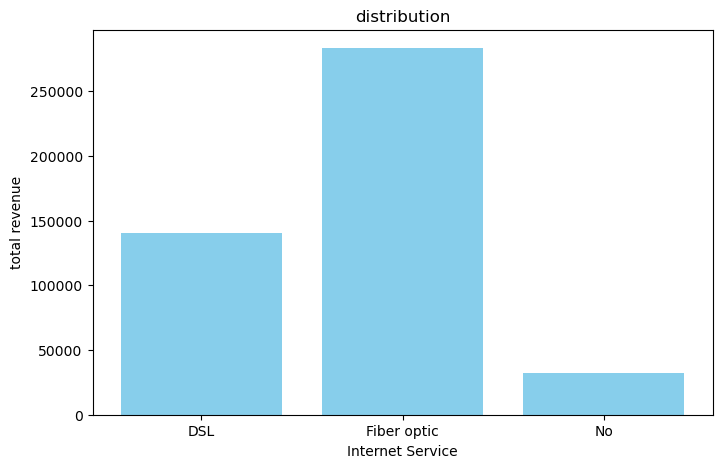

In [13]:

plt.figure(figsize = (8,5))
plt.bar(df_revenue["InternetService"], df_revenue["total_revenue"], color = "skyblue")
#Add labels and titles

plt.xlabel("Internet Service")
plt.ylabel("total revenue")
plt.title("distribution")


#show plot
plt.show()

In [14]:
#check for duplicate
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


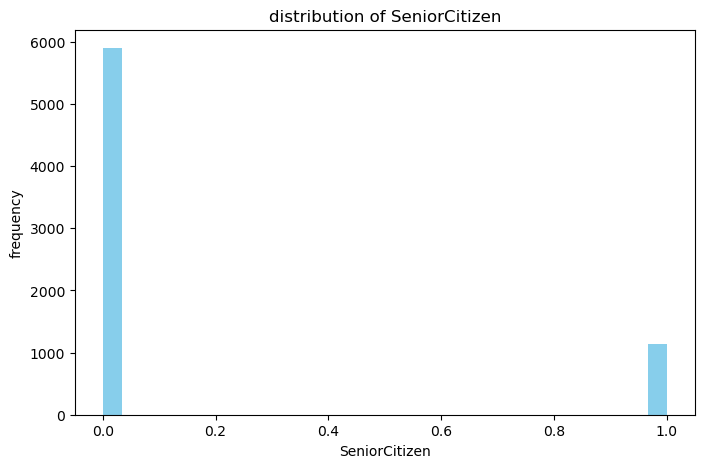

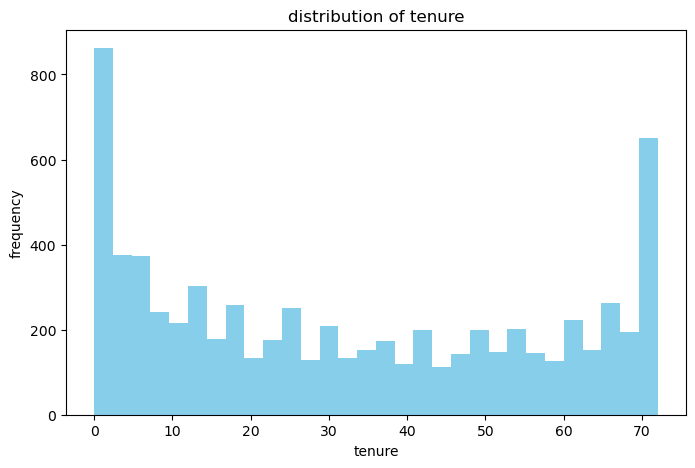

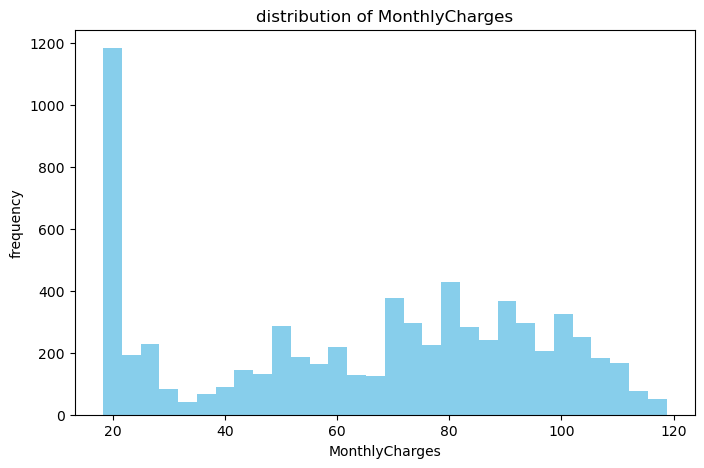

In [16]:
#ploting to evaluate distribution
for column in df.select_dtypes(include=["float64", "int64"]):
    plt.figure(figsize= (8,5))
    plt.hist(df[column], bins = 30, color = "skyblue")
    plt.xlabel(column)
    plt.ylabel("frequency")
    plt.title(f"distribution of {column}")
    plt.show()

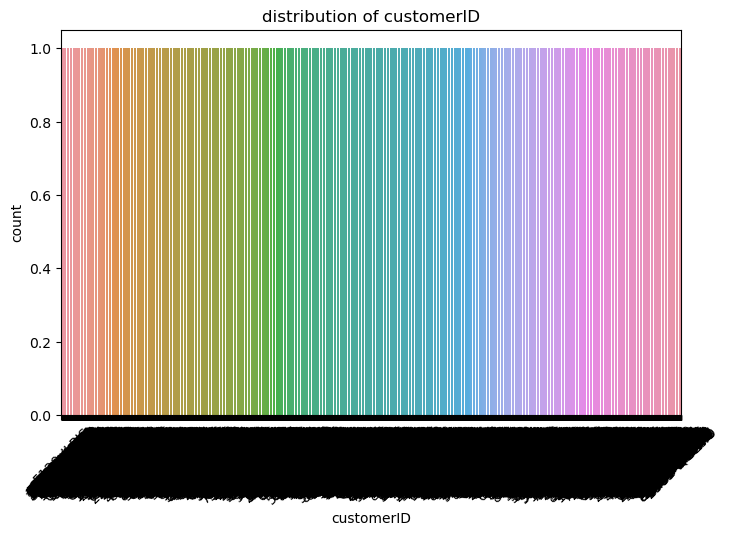

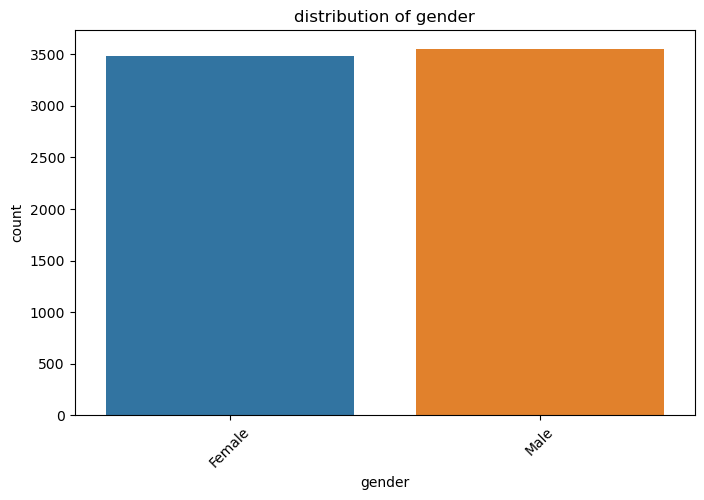

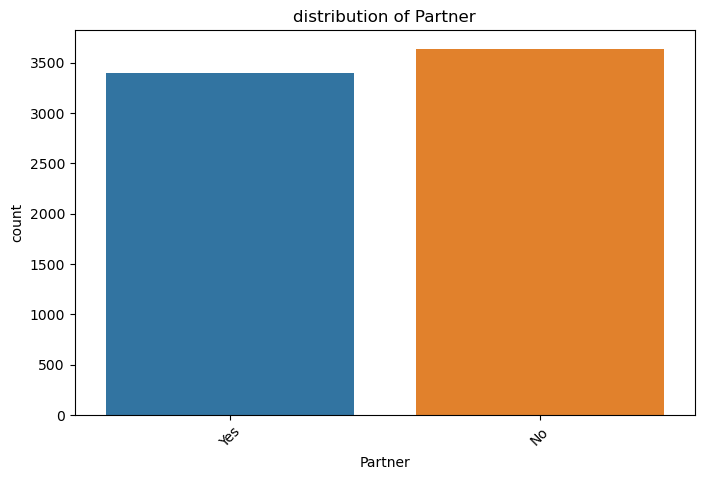

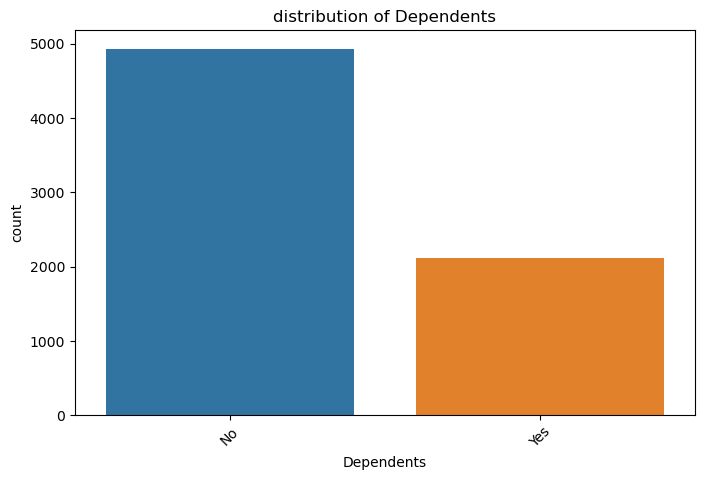

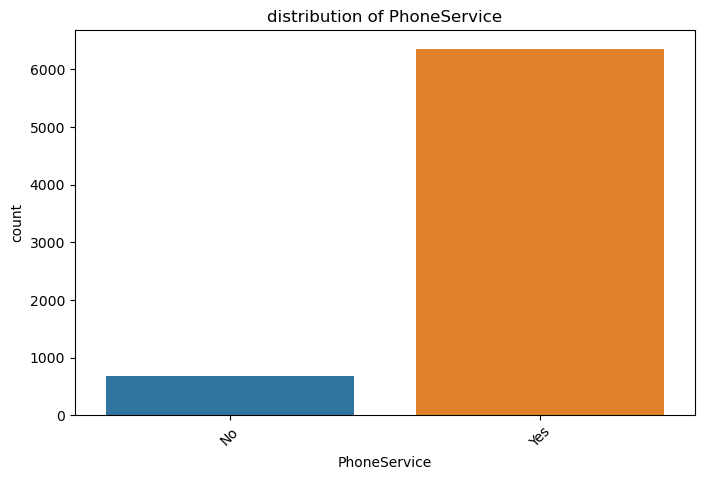

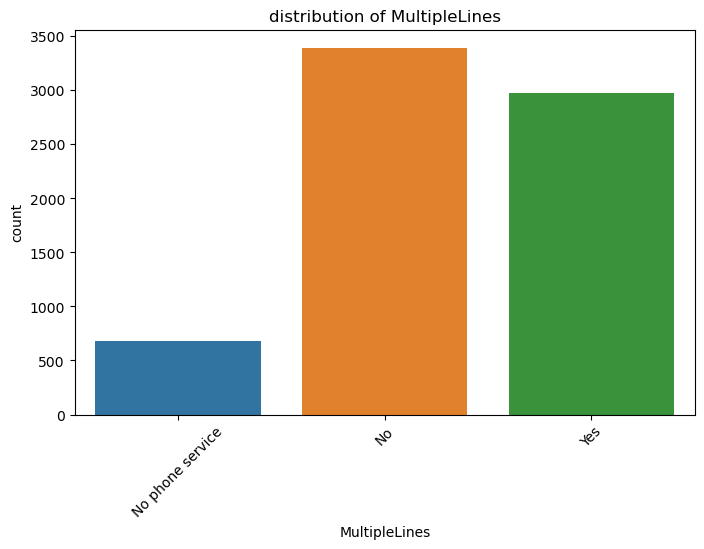

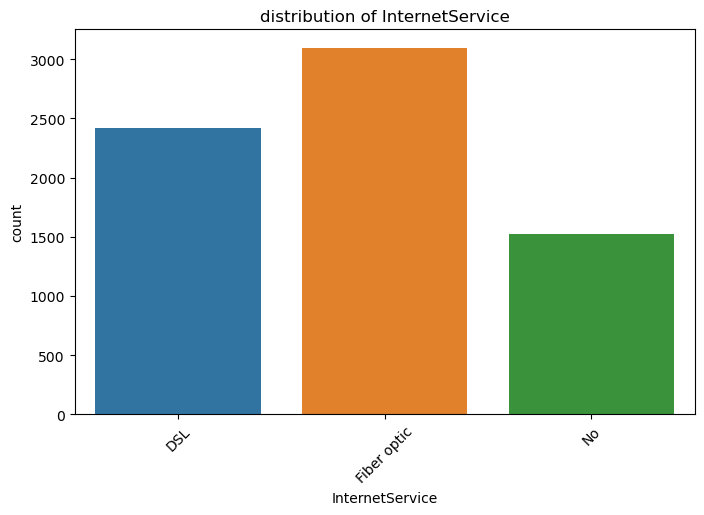

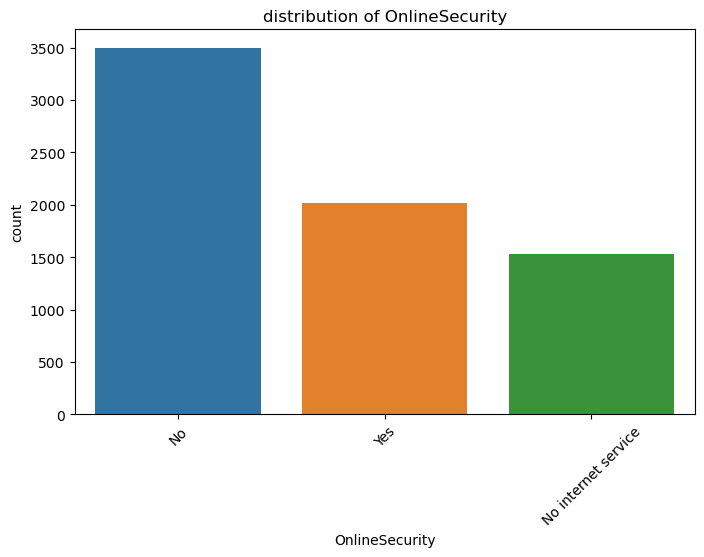

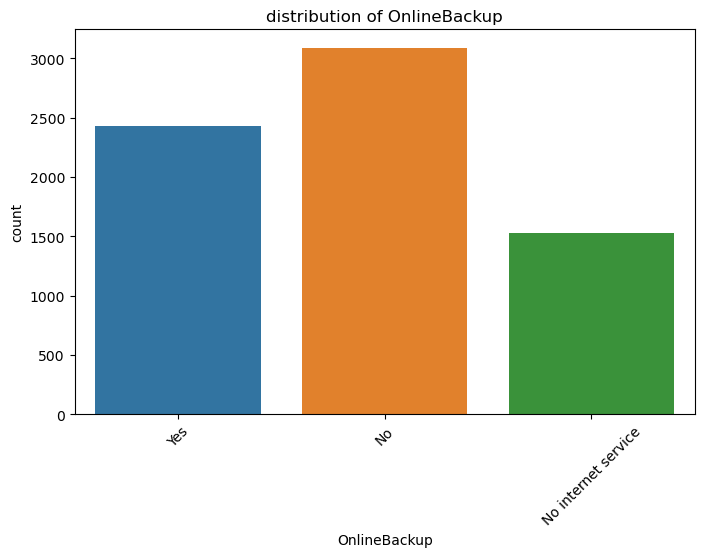

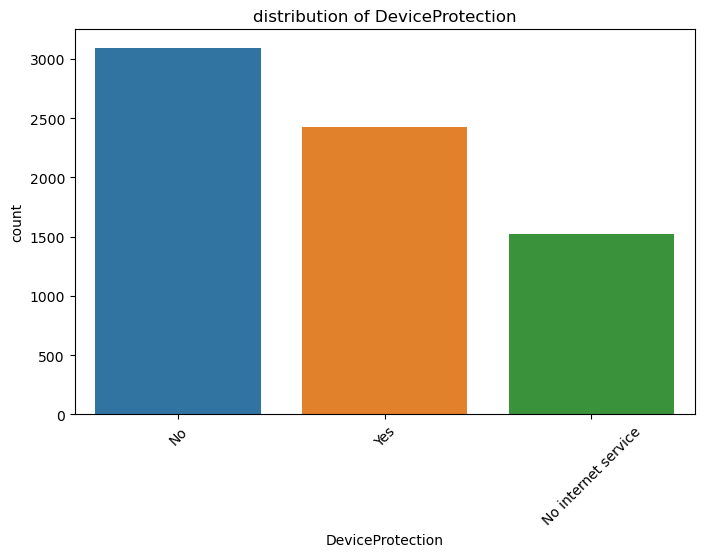

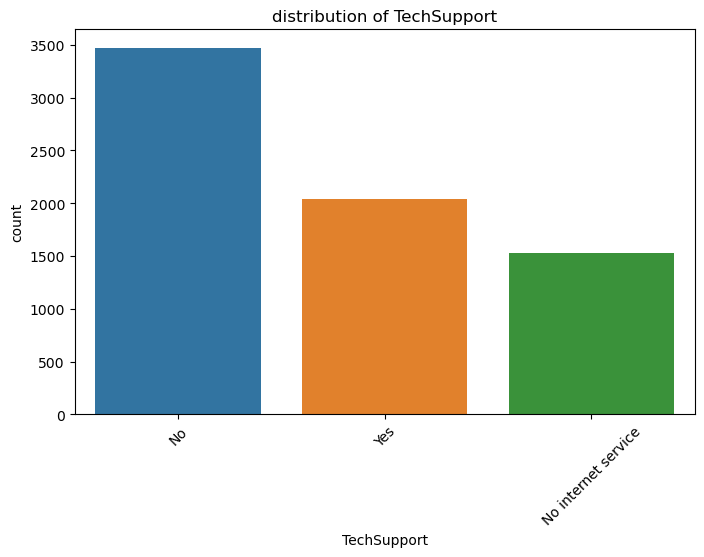

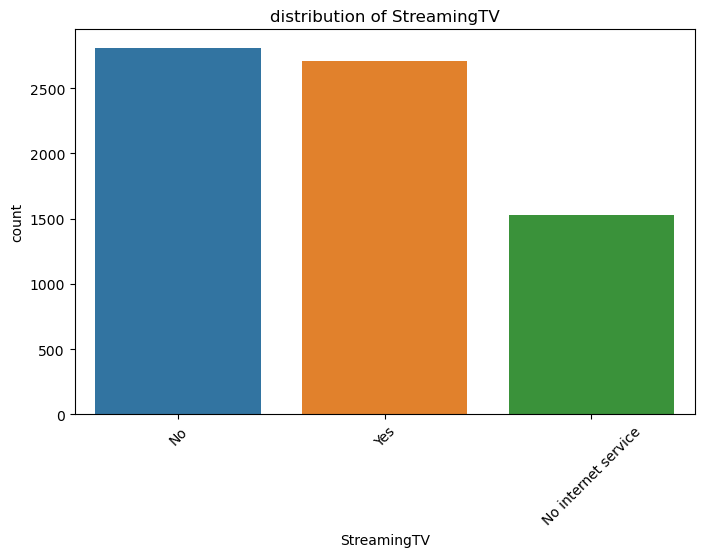

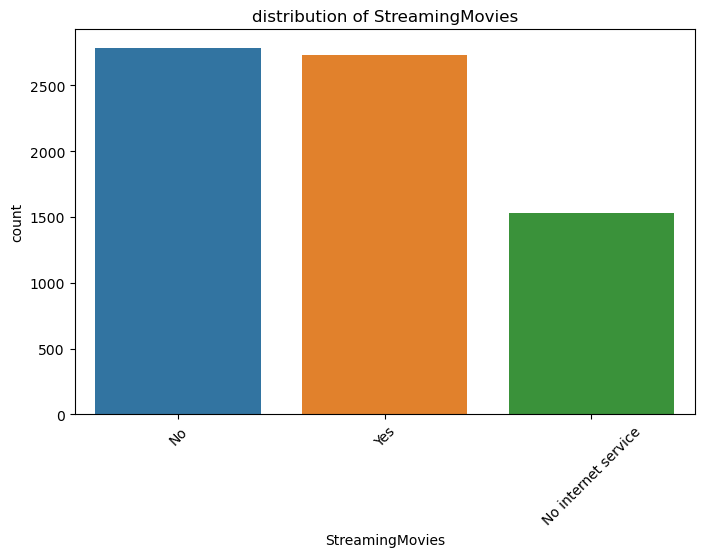

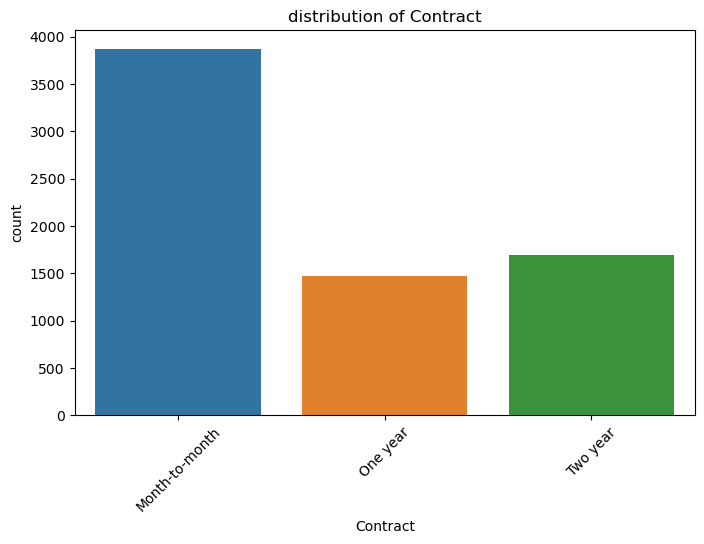

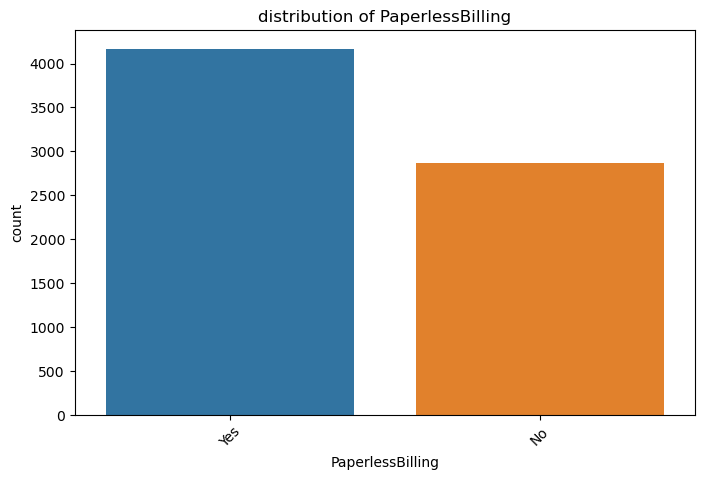

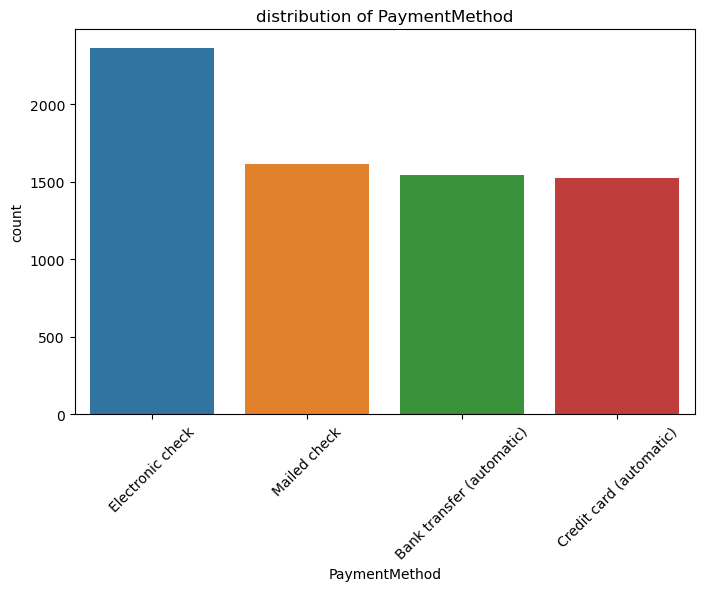

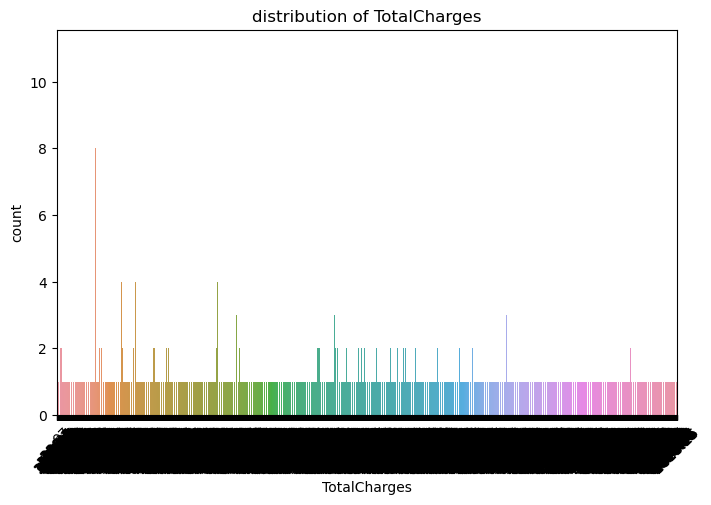

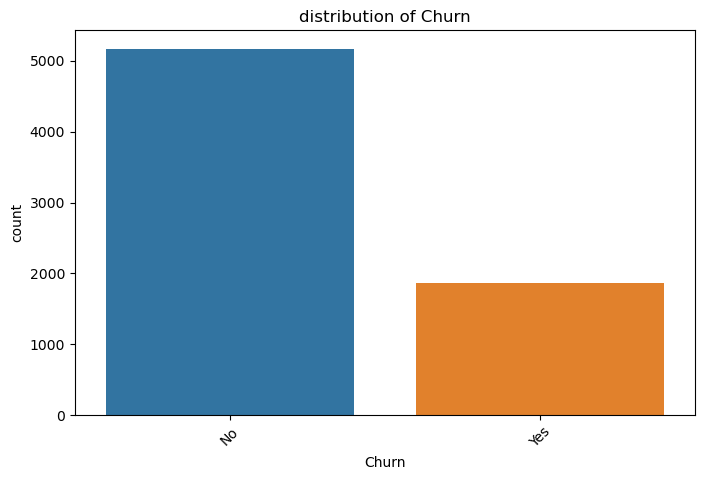

In [17]:
for column in df.select_dtypes(include = ["object", "category"]):
    plt.figure(figsize = (8,5))
    sns.countplot(x= df[column])
    plt.title(f"distribution of {column}")
    plt.xticks(rotation = 45)
    plt.show()